In [1]:
import sys,os
import numpy as np
import pylab as py
import pandas as pd

# Get-predictions -- pion

In [2]:
from analysis.corelib import core
from fitlib.resman import RESMAN

from tools.tools import lprint,checkdir
from tools.config import load_config,conf

import copy

In [3]:
replicas=core.get_replicas('../../analysis-pions/FINALcheck/step16b/')
istep=16

In [4]:
load_config('input.py')
core.mod_conf(istep,replicas[0])
order=replicas[0]['order'][istep]
resman=RESMAN(nworkers=2,parallel=True,datasets=True)

loading ln data sets 20001
loading ln data sets 70001
loading ln data sets 1000
loading ln data sets 70002
Loading DIS tables...
1000 has norm uncertainty
20001 has norm uncertainty
70002 has norm uncertainty
70001 has norm uncertainty


In [5]:
print conf.keys()

['hsmf', 'dmellin', 'nuc smearing', 'su2+su3', 'ftol', 'pdfB', 'pdfA', 'mellin-kaon', 'ln tabs', 'penalty', 'params', 'ffkaon parametrization', 'flat par', 'aux', 'alphaSmode', 'ppdf parametrization', 'hq', 'ln mode', 'ht', 'pion-stfuncs', 'sidis nuc smearing', 'rparams', 'datasets', 'ppdf', 'dsmf', 'steps', 'ln parametrization', 'pdf-pion parametrization', 'dglap mode', 'eweak', 'idis stfuncs', 'SPLFUNC model', 'ffpion', 'tmc', 'ffpion parametrization', 'alphaS', 'dy_pT_scale', 'check lims', 'mellin', 'pdf', 'path2idistab', 'pdf-pion', 'ffkaon', 'bootstrap', 'order', 'Q20', 'ln', 'pdf parametrization', 'ppdfB', 'ppdfA', 'qpdf on', 'mellin-pion']


In [5]:
idx=1000
idxJAM=20001 #--JAM tables
# idx=70001
# idx2=70002

In [6]:
parman=resman.parman
parman.order=order

In [7]:
obsresln=resman.lnres

In [8]:
print obsresln.tabs[idx].keys()
x_idx=obsresln.tabs[idx]['x']
Q2_idx=obsresln.tabs[idx]['Q2']
y_idx=obsresln.tabs[idx]['y']
xpi_idx=obsresln.tabs[idx]['xpi']
xL_idx=obsresln.tabs[idx]['xL']
# kT2max_idx=obsresln.tabs[idx]['kT2max']
t_idx=obsresln.tabs[idx]['t']
# #ye_idx=obsresln.tabs[idx]['ye']

['  sys_u', 'col', 'xpi', 'kT2max', 'thy', 'tar', '    xL     ', 'Shift', 'value', 'N', 'Q2', 'residuals', 'norm_c', 'alpha', 'y', 'x', 'r-residuals', 'obs', '   stat_u    ']


KeyError: 'xL'

In [9]:
# points=[]
# for i in range(len(obsresln.tabs[idx]['N'])):
#     points.append([x_idx[i],Q2_idx[i],xL_idx[i],t_idx[i]])
# points=np.array(points)

In [10]:
# np.save('LeadingBaryon/test',points)

In [11]:
print len(xpi_idx)

58


NameError: name 'idx2' is not defined

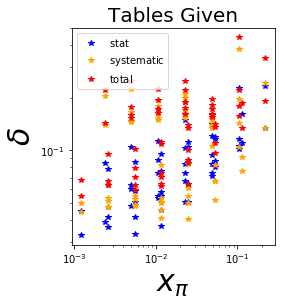

In [13]:
nrows,ncols=1,2
py.figure(figsize=(4*ncols,4*nrows))

#unc=obsresln.tabs[idx]['stat_u']/obsresln.tabs[idx]['value']
unc=obsresln.tabs[idx]['   stat_u    ']/obsresln.tabs[idx]['value']
uncsys=obsresln.tabs[idx]['  sys_u']/obsresln.tabs[idx]['value']
xpi_idx=obsresln.tabs[idx]['xpi']

ax=py.subplot(nrows,ncols,1)
ax.plot(xpi_idx,unc,'*',color='blue',label=r'$\rm stat$')
ax.plot(xpi_idx,uncsys,'*',color='orange',label=r'$\rm systematic$')
ax.plot(xpi_idx,(unc**2+uncsys**2)**0.5,'*',color='red',label=r'$\rm total$')
ax.set_xlabel(r'$x_\pi$',size=30)
ax.set_ylabel(r'$\delta$',size=30)
ax.set_title('Tables Given',size=20)
ax.legend()
ax.semilogx()
ax.semilogy()
#ax.set_ylim(1e-4,2e-2)

unc=obsresln.tabs[idx2]['stat_u']/obsresln.tabs[idx2]['value']
uncsys=obsresln.tabs[idx2]['sys_u']/obsresln.tabs[idx2]['value']
xpi_idx=obsresln.tabs[idx2]['x']/(1-obsresln.tabs[idx2]['xL'])

ax=py.subplot(nrows,ncols,2)
ax.plot(xpi_idx,unc,'*',color='blue',label=r'$\rm stat$')
ax.plot(xpi_idx,uncsys,'*',color='orange',label=r'$\rm systematic$')
ax.plot(xpi_idx,(unc**2+uncsys**2)**0.5,'*',color='red',label=r'$\rm total$')
ax.set_xlabel(r'$x_\pi$',size=30)
ax.set_ylabel(r'$\delta$',size=30)
ax.set_title('JAM',size=20)
#ax.plot()
#ax.legend()
ax.semilogx()
ax.semilogy()
#ax.set_ylim(1e-4,2e-2)



py.tight_layout()
#py.savefig('gallery/EIC_uncertainties_comparison.png')

(1, 1000.0)

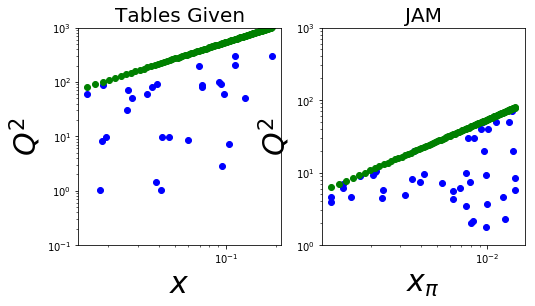

In [36]:
nrows,ncols=1,2
py.figure(figsize=(4*ncols,4*nrows))

unc=obsresln.tabs[idx]['stat_u']/obsresln.tabs[idx]['value']
uncsys=obsresln.tabs[idx]['sys_u']/obsresln.tabs[idx]['value']
xpi_idx=obsresln.tabs[idx]['xpi']
Q2_idx=obsresln.tabs[idx]['Q2']
x_idx=obsresln.tabs[idx]['x']

Q2=5400.*np.linspace(min(x_idx),max(x_idx),100)

ax=py.subplot(nrows,ncols,1)
#ax.plot(xpi_idx,Q2_idx,'o',color='blue')
ax.plot(x_idx,Q2_idx,'o',color='blue')
ax.plot(np.linspace(min(x_idx),max(x_idx),100),Q2,'o',color='g')
ax.set_xlabel(r'$x$',size=30)
ax.set_ylabel(r'$Q^2$',size=30)
ax.set_title('Tables Given',size=20)
#ax.legend()
ax.semilogx()
ax.semilogy()
ax.set_ylim(1e-1,1e3)

unc=obsresln.tabs[idx2]['stat_u']/obsresln.tabs[idx2]['value']
uncsys=obsresln.tabs[idx2]['sys_u']/obsresln.tabs[idx2]['value']
xpi_idx=obsresln.tabs[idx2]['x']/(1-obsresln.tabs[idx2]['xL'])
Q2_idx=obsresln.tabs[idx2]['Q2']
x_idx=obsresln.tabs[idx2]['x']
Q2=5400.*np.linspace(min(x_idx),max(x_idx),100)

ax=py.subplot(nrows,ncols,2)
ax.plot(x_idx,Q2_idx,'o',color='blue')
ax.plot(np.linspace(min(x_idx),max(x_idx),100),Q2,'go')
ax.set_xlabel(r'$x_\pi$',size=30)
ax.set_ylabel(r'$Q^2$',size=30)
ax.set_title('JAM',size=20)
#ax.plot()
#ax.legend()
ax.semilogx()
ax.semilogy()
ax.set_ylim(1,1e3)



# py.tight_layout()
# #py.savefig('gallery/EIC_x_Q2.png')

In [15]:
pred={}
pred[idx]=[]
pred[idx2]=[]
pred[idxJAM]=[]
for i in range(len(replicas)):
    lprint('progress: %d/%d'%(i,len(replicas)))
    rep=replicas[i]
    parman.par=copy.copy(rep['params'][istep])
    parman.order=copy.copy(rep['order'][istep])
    par,order=[],[]
    for j in range(len(parman.order)):
        if parman.order[j][0]==2: continue
        else: 
            par.append(parman.par[j])
            order.append(parman.order[j])
    parman.par=par
    parman.order=order
    res,rres,nres=resman.get_residuals(parman.par)
    pred[idx].append(obsresln.tabs[idx]['prediction'])
    pred[idx2].append(obsresln.tabs[idx2]['prediction'])
    pred[idxJAM].append(obsresln.tabs[idxJAM]['prediction'])

progress: 785/786

In [16]:
#units=0.389379372e12 #--for fm

In [17]:
meanpred={}
stdpred={}
for k in pred:
    meanpred[k]=np.mean(pred[k],axis=0)#*units
    stdpred[k]=np.std(pred[k],axis=0)#*units

In [18]:
print meanpred
print ''
print stdpred

{70001: array([8.56973924e+08, 2.30533588e+09, 7.56181678e+08, 2.67518683e+07,
       7.76051089e+06, 1.09977671e+07, 2.71607472e+07, 1.44087656e+07,
       2.47294815e+06, 4.08231750e+07, 3.64329484e+06, 6.44032340e+03,
       2.87492574e+04, 1.39825298e+05, 8.56592548e+05, 1.94542221e+03,
       9.36157029e+04, 7.96188081e+04, 1.32930989e+05, 2.01026812e+04,
       2.45274781e+05, 5.69811884e+04, 8.66799447e+03, 2.64264678e+04,
       2.58076479e+04, 2.39063051e+02, 6.54130064e+01, 1.81269162e+03]), 70002: array([5.04136868e+09, 3.57787458e+09, 3.84247817e+09, 2.45064257e+09,
       4.34944025e+08, 1.33972251e+09, 1.84466677e+09, 1.81400621e+09,
       1.98804459e+08, 1.98484242e+09, 1.45616849e+09, 3.62339942e+08,
       8.43661055e+08, 1.11122389e+09, 1.19414160e+09, 4.99514269e+08,
       5.61783492e+08, 2.78396967e+08, 5.71300558e+08, 3.74653550e+08,
       2.24823326e+07, 9.41896510e+07, 1.49767103e+08, 3.00109549e+08,
       1.57479734e+08, 4.81924356e+07, 2.20977415e+08, 2.794

In [19]:
for k in meanpred:
    print stdpred[k]/meanpred[k]

[0.14943665 0.05691366 0.07931806 0.12780222 0.09267196 0.1458551
 0.05039162 0.07784218 0.20569429 0.04021601 0.04292562 0.15075378
 0.19827972 0.07783675 0.03809111 0.33637434 0.11976008 0.10355563
 0.06678954 0.1177039  0.05178216 0.07868495 0.1668464  0.09483874
 0.05161683 0.15319195 0.14516286 0.09096976]
[0.13501589 0.12500697 0.13804248 0.1225121  0.07221218 0.08239562
 0.09503143 0.09536015 0.05879399 0.0644253  0.06540667 0.06360293
 0.0904317  0.05523289 0.06050703 0.07225067 0.08517483 0.07091435
 0.06157204 0.06686007 0.09353945 0.05601314 0.0502368  0.04406954
 0.05039501 0.04158726 0.06502835 0.07278817 0.04547568 0.03944344
 0.05866798 0.03487593 0.05040408 0.05600907 0.0394744  0.04292107
 0.04028402 0.04115802 0.03742984 0.03623775 0.0411549  0.03790693]
[0.2399439  0.31346365 0.20894856 0.26625236 0.15807214 0.11617976
 0.17410759 0.22898031 0.15149108 0.11565894 0.12889654 0.08065114
 0.12966386 0.19873657 0.12669633 0.11866774 0.11429555 0.08331457
 0.11458349 0.06

In [20]:
xsec=meanpred
dxsec=stdpred

In [21]:
resman.shutdown()

In [22]:
# print obsresln.tabs[idx]['Yield']

In [23]:
# c={}
# c['value']=np.load('data/checker.npy')

In [24]:
d={}
for k in meanpred:
    if k==20001: continue
    d[k]={}
    d[k]['value']=xsec[k]

In [25]:
# print(c['value'])
# print(d['value'])
# print d['value']/c['value']

In [60]:
# for k in d:
#     d[k]['counts']=[]
#     d[k]['dcounts_stat']=[]
#     d[k]['dcounts_sys']=[]
#     d[k]['stat_u']=[]
#     d[k]['sys_u']=[]
#     d[k]['x']=[]
#     d[k]['Q2']=[]
#     for i in range(len(obsresln.tabs[k]['Q2'])):
#         if obsresln.tabs[k]['Q2'][i]<10: dQ2=1.
#         elif 10<obsresln.tabs[k]['Q2'][i]<100: dQ2=10.
#         else: dQ2=100.
#         if k==70001: delV=1e-3*dQ2
#         elif k==70002: delV=1e-5*dQ2

#         d[k]['counts'].append(d[k]['value'][i]*100*delV*obsresln.tabs[k]['events per bin'][i])
#         d[k]['dcounts_stat'].append(np.sqrt(d[k]['counts'][i]))
#         d[k]['dcounts_sys'].append(0.012*d[k]['counts'][i])
#         #d['stat_u'].append((xsec[i]/100./delV)**0.5)
#         #d[k]['stat_u'].append((d[k]['value'][i]/100./delV/obsresln.tabs[k]['events per bin'][i])**0.5)
#         d[k]['stat_u'].append(d[k]['value'][i]*d[k]['dcounts_stat'][i]/d[k]['counts'][i])
#         d[k]['sys_u'].append(d[k]['value'][i]*0.012)
#         d[k]['x'].append(obsresln.tabs[k]['x'][i])
#         d[k]['Q2'].append(obsresln.tabs[k]['Q2'][i])
#     for kk in d[k]:
#         d[k][kk]=np.array(d[k][kk])

In [26]:
for k in d:
    d[k]['counts']=[]
    d[k]['dcounts_stat']=[]
    d[k]['dcounts_sys']=[]
    d[k]['stat_u']=[]
    d[k]['sys_u']=[]
    d[k]['x']=[]
    d[k]['Q2']=[]
    for i in range(len(obsresln.tabs[k]['Q2'])):
        if obsresln.tabs[k]['Q2'][i]<10: dQ2=1.
        elif 10<obsresln.tabs[k]['Q2'][i]<100: dQ2=10.
        else: dQ2=100.
        if k==70001: delV=1e-3*dQ2
        elif k==70002: delV=1e-5*dQ2

        d[k]['counts'].append(d[k]['value'][i]*100*delV*(6.0/15.0))
        d[k]['dcounts_stat'].append(np.sqrt(d[k]['counts'][i]))
        d[k]['dcounts_sys'].append(0.012*d[k]['counts'][i])
        #d['stat_u'].append((xsec[i]/100./delV)**0.5)
        #d[k]['stat_u'].append((d[k]['value'][i]/100./delV/obsresln.tabs[k]['events per bin'][i])**0.5)
        d[k]['stat_u'].append((d[k]['value'][i]*(15.0/6.0)/100/delV)**0.5)
        d[k]['sys_u'].append(d[k]['value'][i]*0.012)
        d[k]['x'].append(obsresln.tabs[k]['x'][i])
        d[k]['Q2'].append(obsresln.tabs[k]['Q2'][i])
    for kk in d[k]:
        d[k][kk]=np.array(d[k][kk])

In [29]:
dd={}
for k in d:
    dd[k]={}
    dd[k]['value']=d[k]['value']
    dd[k]['counts']=[]
    dd[k]['dcounts_stat']=[]
    dd[k]['dcounts_sys']=[]
    dd[k]['stat_u']=[]
    dd[k]['sys_u']=[]
    dd[k]['x']=[]
    dd[k]['Q2']=[]
    for i in range(len(obsresln.tabs[k]['Q2'])):
        if obsresln.tabs[k]['Q2'][i]<10: dQ2=1.
        elif 10<obsresln.tabs[k]['Q2'][i]<100: dQ2=10.
        else: dQ2=100.
        if k==70001: delV=1e-3*dQ2
        elif k==70002: delV=1e-5*dQ2

        dd[k]['counts'].append(dd[k]['value'][i]*100*delV)
        dd[k]['dcounts_stat'].append(np.sqrt(dd[k]['counts'][i]))
        dd[k]['dcounts_sys'].append(0.012*dd[k]['counts'][i])
        #d['stat_u'].append((xsec[i]/100./delV)**0.5)
        dd[k]['stat_u'].append((dd[k]['value'][i]/100./delV)**0.5)
        dd[k]['sys_u'].append(dd[k]['value'][i]*0.012)
        dd[k]['x'].append(obsresln.tabs[k]['x'][i])
        dd[k]['Q2'].append(obsresln.tabs[k]['Q2'][i])
    for kk in dd[k]:
        dd[k][kk]=np.array(dd[k][kk])

In [28]:
# c['counts']=[]
# c['dcounts_stat']=[]
# c['dcounts_sys']=[]
# c['stat_u']=[]
# c['sys_u']=[]
# for i in range(len(obsresln.tabs[idx]['Q2'])):
#     if obsresln.tabs[idx]['Q2'][i]<10: dQ2=1.
#     elif 10<obsresln.tabs[idx]['Q2'][i]<100: dQ2=10
#     else: dQ2=100
#     delV=1e-3*dQ2
#     #delV=1e-1*dQ2
#     c['counts'].append(c['value'][i]*delV)
#     c['dcounts_stat'].append(np.sqrt(c['counts'][i]))
#     c['dcounts_sys'].append(0.012*c['counts'][i])
#     c['stat_u'].append((c['value'][i]/100./delV)**0.5)
#     c['sys_u'].append(c['value'][i]*0.012)
# for k in c:
#     c[k]=np.array(c[k])

In [29]:
# r={}
# r['counts']=[]
# r['value']=[]
# r['dcounts_stat']=[]
# r['dcounts_sys']=[]
# r['stat_u']=[]
# r['sys_u']=[]
# for i in range(len(obsresln.tabs[idx]['Q2'])):
#     if obsresln.tabs[idx]['Q2'][i]<10: dQ2=1.
#     elif 10<obsresln.tabs[idx]['Q2'][i]<100: dQ2=10.
#     else: dQ2=100.
#     #dQ2=1
#     delV=1e-3*dQ2
#     #delV=1e-1*dQ2
   
#     #r['counts'].append(obsresln.tabs[idx]['Yield'][i]*d['value'][i]/c['value'][i])
#     r['counts'].append(obsresln.tabs[idx]['Num'][i])
#     r['value'].append(r['counts'][i]/100./delV)
#     r['dcounts_stat'].append(np.sqrt(r['counts'][i]))
#     r['dcounts_sys'].append(0.012*r['counts'][i])
#     r['stat_u'].append((r['value'][i]/100./delV)**0.5)
#     r['sys_u'].append(r['value'][i]*0.012)
# for k in r:
#     r[k]=np.array(r[k])

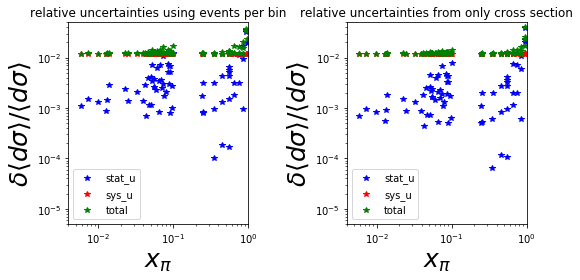

In [30]:
nrows,ncols=1,2
py.figure(figsize=(4*ncols,4*nrows))

for k in d:
    ax=py.subplot(nrows,ncols,1)
    ax.plot(obsresln.tabs[k]['xpi'],d[k]['stat_u']/d[k]['value'],'b*',label='stat_u')
    ax.plot(obsresln.tabs[k]['xpi'],d[k]['sys_u']/d[k]['value'],'r*',label='sys_u')
    ax.plot(obsresln.tabs[k]['xpi'],(d[k]['stat_u']**2+d[k]['sys_u']**2)**0.5/d[k]['value'],'g*',label='total')
    ax.set_title('relative uncertainties using events per bin')
    ax.set_ylabel(r'$\delta \langle d\sigma\rangle /\langle d\sigma \rangle$',size=25)
    ax.set_xlabel(r'$x_\pi$',size=25)
    ax.semilogx()
    ax.semilogy()
    ax.set_xlim(4e-3,1)
    ax.set_ylim(5e-6,5e-2)
    if k==70001: ax.legend()

    # ax=py.subplot(nrows,ncols,2)
    # ax.plot(obsresln.tabs[idx]['xpi'],obsresln.tabs[idx]['Yield']**(-0.5),'*',label='stat_u')
    # ax.plot(obsresln.tabs[idx]['xpi'],0.012*np.ones(len(obsresln.tabs[idx]['xpi'])),'*',label='sys_u')
    # ax.plot(obsresln.tabs[idx]['xpi'],((obsresln.tabs[idx]['Yield']**(0.5))**2+(obsresln.tabs[idx]['Yield']*0.012)**2)**0.5/obsresln.tabs[idx]['Yield'],'*',label='total')
    # ax.set_xlim(1e-1,1)
    # ax.set_title('Richard relative uncertainties')
    # #ax.set_ylabel(r'$\delta \sigma/\sigma$')
    # ax.semilogx()
    # ax.semilogy()
    # ax.set_xlim(1e-1,1)
    # ax.legend()

    ax=py.subplot(nrows,ncols,2)
    ax.plot(obsresln.tabs[k]['xpi'],dd[k]['stat_u']/dd[k]['value'],'b*',label='stat_u')
    ax.plot(obsresln.tabs[k]['xpi'],dd[k]['sys_u']/dd[k]['value'],'r*',label='sys_u')
    ax.plot(obsresln.tabs[k]['xpi'],(dd[k]['stat_u']**2+dd[k]['sys_u']**2)**0.5/dd[k]['value'],'g*',label='total')
    ax.set_title('relative uncertainties from only cross section')
    ax.set_ylabel(r'$\delta \langle d\sigma\rangle /\langle d\sigma \rangle$',size=25)
    ax.set_xlabel(r'$x_\pi$',size=25)
    ax.semilogx()
    ax.semilogy()
    ax.set_xlim(4e-3,1)
    ax.set_ylim(5e-6,5e-2)
    if k==70001: ax.legend()

py.tight_layout()
#py.savefig('gallery/new_relative_uncertainties.png')

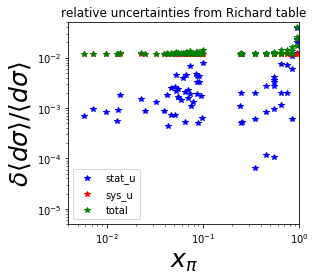

In [31]:
nrows,ncols=1,2
py.figure(figsize=(4*ncols,4*nrows))

for k in dd:
    if k==20001:
        ax=py.subplot(nrows,ncols,2)
        ax.plot(obsresln.tabs[k]['xpi'],obsresln.tabs[k]['stat_u']/obsresln.tabs[k]['value'],'b*',label='stat_u')
        ax.plot(obsresln.tabs[k]['xpi'],obsresln.tabs[k]['sys_u']/obsresln.tabs[k]['value'],'r*',label='sys_u')
        ax.plot(obsresln.tabs[k]['xpi'],(obsresln.tabs[k]['stat_u']**2+obsresln.tabs[k]['sys_u']**2)**0.5/obsresln.tabs[k]['value'],'g*',label='total')
        ax.set_title('relative uncertainties from JAM tables')
        ax.set_ylabel(r'$\delta \langle d\sigma\rangle /\langle d\sigma \rangle$',size=25)
        ax.set_xlabel(r'$x_\pi$',size=25)
        ax.semilogx()
        ax.semilogy()
        ax.set_xlim(4e-3,1)
        ax.set_ylim(5e-6,5e-2)
        ax.legend()

    else:       
        ax=py.subplot(nrows,ncols,1)
        ax.plot(obsresln.tabs[k]['xpi'],dd[k]['stat_u']/dd[k]['value'],'b*',label='stat_u')
        ax.plot(obsresln.tabs[k]['xpi'],dd[k]['sys_u']/dd[k]['value'],'r*',label='sys_u')
        ax.plot(obsresln.tabs[k]['xpi'],(dd[k]['stat_u']**2+dd[k]['sys_u']**2)**0.5/dd[k]['value'],'g*',label='total')
        ax.set_title('relative uncertainties from Richard table')
        ax.set_ylabel(r'$\delta \langle d\sigma\rangle /\langle d\sigma \rangle$',size=25)
        ax.set_xlabel(r'$x_\pi$',size=25)
        ax.semilogx()
        ax.semilogy()
        ax.set_xlim(4e-3,1)
        ax.set_ylim(5e-6,5e-2)
        if k==70001: ax.legend()

py.tight_layout()
#py.savefig('gallery/relative_uncertainties_comp.png')

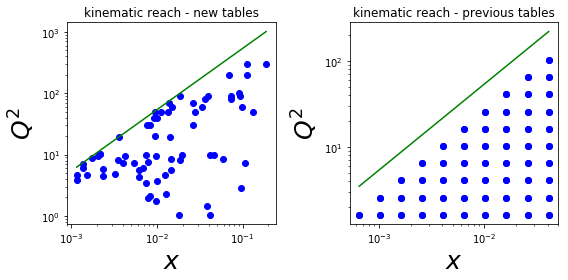

In [32]:
nrows,ncols=1,2
py.figure(figsize=(4*ncols,4*nrows))

s=5400.
for k in [70001,70002]:

    ax=py.subplot(nrows,ncols,1)
    x=np.linspace(min(obsresln.tabs[k]['x']),max(obsresln.tabs[k]['x']),100)
    Q2=s*x
    ax.plot(obsresln.tabs[k]['x'],obsresln.tabs[k]['Q2'],'bo')
    ax.plot(x,Q2,'g')
    ax.set_title('kinematic reach - new tables')
    ax.set_ylabel(r'$Q^2$',size=25)
    ax.set_xlabel(r'$x$',size=25)
    ax.semilogx()
    ax.semilogy()
#     ax.set_xlim(4e-3,1)
#     ax.set_ylim(5e-6,5e-2)

ax=py.subplot(nrows,ncols,2)
x=np.linspace(min(obsresln.tabs[20001]['x']),max(obsresln.tabs[20001]['x']))
Q2=s*x
ax.plot(obsresln.tabs[20001]['x'],obsresln.tabs[20001]['Q2'],'bo')
ax.plot(x,Q2,'g')
ax.set_title('kinematic reach - previous tables')
ax.set_ylabel(r'$Q^2$',size=25)
ax.set_xlabel(r'$x$',size=25)
ax.semilogx()
ax.semilogy()


py.tight_layout()
py.savefig('gallery/kinematic_reach.png')

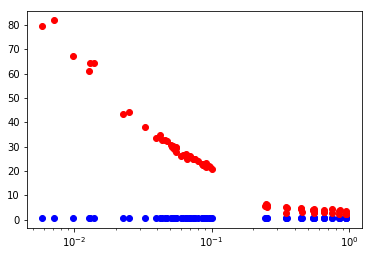

In [33]:
for k in d:
    ax=py.subplot(111)
    ax.plot(obsresln.tabs[k]['xpi'],dd[k]['stat_u']/d[k]['stat_u'],'bo')
    ax.plot(obsresln.tabs[k]['xpi'],obsresln.tabs[k]['events per bin']**0.5,'ro')
    ax.semilogx()

In [40]:
# nrows,ncols=1,3
# py.figure(figsize=(4*ncols,4*nrows))

# ax=py.subplot(nrows,ncols,1)
# ax.plot(obsresln.tabs[idx]['Q2'],d['stat_u']/d['value'],'*',label='stat_u')
# ax.plot(obsresln.tabs[idx]['Q2'],d['sys_u']/d['value'],'*',label='sys_u')
# ax.plot(obsresln.tabs[idx]['Q2'],(d['stat_u']**2+d['sys_u']**2)**0.5/d['value'],'*',label='total')
# ax.set_title('My relative uncertainties from calculation')
# ax.set_ylabel(r'$\delta \sigma/\sigma$',size=20)
# ax.set_xlabel(r'$Q^2$',size=20)
# ax.semilogx()
# ax.semilogy()
# #ax.set_xlim(5e-2,1)
# ax.set_ylim(1e-6,4e-1)
# ax.legend()

# ax=py.subplot(nrows,ncols,2)
# ax.plot(obsresln.tabs[idx]['Q2'],c['stat_u']/c['value'],'*',label='stat_u')
# ax.plot(obsresln.tabs[idx]['Q2'],c['sys_u']/c['value'],'*',label='sys_u')
# ax.plot(obsresln.tabs[idx]['Q2'],(c['stat_u']**2+c['sys_u']**2)**0.5/c['value'],'*',label='total')
# ax.set_title('My relative uncertainties from interpolation')
# ax.set_ylabel(r'$\delta \sigma/\sigma$',size=20)
# ax.set_xlabel(r'$Q^2$',size=20)
# ax.semilogx()
# ax.semilogy()
# #ax.set_xlim(5e-2,1)
# ax.set_ylim(1e-6,4e-1)
# ax.legend()


# ax=py.subplot(nrows,ncols,3)
# ax.plot(obsresln.tabs[idx]['Q2'],r['stat_u']/r['value'],'*',label='stat_u')
# ax.plot(obsresln.tabs[idx]['Q2'],r['sys_u']/r['value'],'*',label='sys_u')
# ax.plot(obsresln.tabs[idx]['Q2'],(r['stat_u']**2+r['sys_u']**2)**0.5/r['value'],'*',label='total')
# ax.set_title('Richard relative uncertainties')
# ax.set_ylabel(r'$\delta \sigma/\sigma$',size=20)
# ax.set_xlabel(r'$Q^2$',size=20)
# ax.semilogx()
# ax.semilogy()
# #ax.set_xlim(5e-2,1)
# ax.set_ylim(1e-6,4e-1)
# ax.legend()

# py.tight_layout()
# #py.savefig('gallery/relativeuncertainties.png')

In [41]:
# nrows,ncols=1,3
# py.figure(figsize=(4*ncols,4*nrows))
# ax=py.subplot(nrows,ncols,1)
# ax.plot(obsresln.tabs[idx]['Q2'],d['counts'],'o',label='my counts')
# ax.plot(obsresln.tabs[idx]['Q2'],r['counts'],'o',label='Richard counts')
# ax.set_title('counts per bin')
# ax.set_ylabel(r'$N$',size=20)
# ax.set_xlabel(r'$Q^2 ({\rm GeV}^2)$',size=20)
# ax.semilogy()
# ax.semilogx()
# ax.legend()

# ax=py.subplot(nrows,ncols,2)
# ax.plot(obsresln.tabs[idx]['Q2'],d['counts']/r['counts'],'o')
# ax.set_title('ratio of my counts to Richard')
# ax.set_ylabel(r'$N_P/N_R$',size=20)
# ax.set_xlabel(r'$Q^2 ({\rm GeV}^2)$',size=20)
# ax.semilogy()
# ax.semilogx()

# ax=py.subplot(nrows,ncols,3)
# ax.plot(obsresln.tabs[idx]['Q2'],d['dcounts_stat']/d['counts'],'o',label='mine')
# ax.plot(obsresln.tabs[idx]['Q2'],r['counts']**(-0.5),'o',label='Richard')
# ax.plot(obsresln.tabs[idx]['Q2'],np.ones(len(obsresln.tabs[idx]['Q2']))*0.012,'o',label='1.2% sys')
# ax.set_title('relative statistical uncertainties')
# ax.set_xlabel(r'$Q^2 ({\rm GeV}^2)$',size=20)
# ax.set_ylabel(r'$\delta N/N$',size=20)
# ax.semilogx()
# ax.semilogy()
# ax.legend()

# py.tight_layout()
# #py.savefig('gallery/counts.png')

In [34]:
xlsx_d=pd.DataFrame(d[70001])
xlsx_d.to_excel('uncertaintyhighx70003_final.xlsx')

xlsx_d=pd.DataFrame(d[70002])
xlsx_d.to_excel('uncertaintylowx70004_final.xlsx')

In [47]:
xlsx_dd=pd.DataFrame(dd[70001])
xlsx_dd.to_excel('thytablehighx.xlsx')

xlsx_dd=pd.DataFrame(dd[70002])
xlsx_dd.to_excel('thytablelowx.xlsx')

In [62]:
xlsx_c=pd.DataFrame(c)
xlsx_c.to_excel('checkthytable1_27_2021.xlsx')

In [31]:
#--To calculate the statistical uncertainties

# lum=100
# stat_u=[]
# N_events=[]
# for i in range(len(obsresln.tabs[idx]['N'])):
#     xs=xsec[i]
#     #delx=data['xmax'][i]-data['xmin'][i]
#     #delQ2=data['q2max'][i]-data['q2min'][i]
#     #delxL=data['xLmax'][i]-data['xLmin'][i]
#     #delV=delx*delQ2*delxL
# #     delQ2=obsresln.tabs[idx]['q2max'][i]-obsresln.tabs[idx]['q2min'][i]
# #     dely=obsresln.tabs[idx]['ymax'][i]-obsresln.tabs[idx]['ymin'][i]
# #     delxpi=obsresln.tabs[idx]['xpimax'][i]-obsresln.tabs[idx]['xpimin'][i]
#     delQ2=obsresln.tabs[idx]['Q2 bin width'][i]
#     dely =obsresln.tabs[idx]['y bin width'][i]
#     delxpi=obsresln.tabs[idx]['x_pi bin width'][i]
#     delV=delQ2*dely*delxpi
#     #print delQ2
#     #print delV
#     N_events.append(lum*delV*xs)
#     #print N_events,N_events**0.5
#     stat_u.append((xs/lum/delV)**0.5)

In [32]:
#print xsec,stat_u

In [33]:
# sig=[]
# sig_stat=[]
# sig_syst_o=[]
# sig_syst_p=[]
# for i in range(len(obsresln.tabs[idx]['N'])):
#     sig.append(xsec[i])
#     sig_stat.append(stat_u[i])
#     sig_syst_o.append(0.01*xsec[i])
#     sig_syst_p.append(0.012*xsec[i])
# sig=np.array(sig)
# sig_stat=np.array(sig_stat)
# sig_syst_o=np.array(sig_syst_o)
# sig_syst_p=np.array(sig_syst_p)

In [34]:
print len(obsresln.tabs[idx]['x'])

73


In [35]:
sig=obsresln.tabs[idx]['value']
sig_stat=obsresln.tabs[idx]['stat_u']
sig_syst=obsresln.tabs[idx]['sys_u']

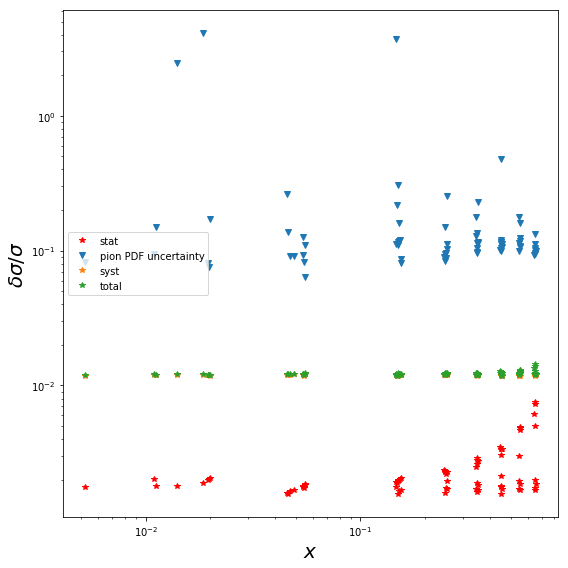

In [36]:
nrows,ncols=1,1
fig=py.figure(figsize=(8*ncols,8*nrows))
ax=py.subplot(nrows,ncols,1)
ax.plot(obsresln.tabs[idx]['xpi'],sig_stat/sig,'*',label='stat',color='r')
#ax.plot(obsresln.tabs[idx]['x'],sig_syst_o/sig,'*',label='syst optimistic',color='blue')
ax.plot(obsresln.tabs[idx]['xpi'],dxsec/xsec,'v',label='pion PDF uncertainty')
#ax.plot(data['x0'],(sig_stat**2+sig_syst_o**2+dxsec**2)**0.5/sig,'<',label='total optimistic')
#ax.plot(data['x0'],(sig_stat**2+sig_syst_o**2)**0.5/sig,'<',label='total optimistic')
ax.plot(obsresln.tabs[idx]['xpi'],sig_syst/sig,'*',label='syst')
ax.plot(obsresln.tabs[idx]['xpi'],(sig_stat**2+sig_syst**2)**0.5/sig,'*',label='total')
ax.set_xlabel(r'$x$',size=20)
ax.set_ylabel(r'$\delta\sigma/\sigma$',size=20)
#ax.set_ylim(5e-3,4e-1)
ax.semilogx()
ax.semilogy()
ax.legend(loc='center left')

# unc=obsresln.tabs[idx]['   stat_u    ']/obsresln.tabs[idx]['value']
# uncsys=obsresln.tabs[idx]['  sys_u']/obsresln.tabs[idx]['value']
# ax=py.subplot(nrows,ncols,2)
# ax.plot(x_idx,unc,'*',color='red')
# ax.plot(x_idx,uncsys,'*',color='blue')
# ax.set_ylim(5e-3,4e-1)
# ax.semilogx()
# ax.semilogy()

py.tight_layout()
checkdir('gallery')
#py.savefig('gallery/uncertainties.png')

# Get-predictions -- kaon

In [2]:
from analysis.corelib import core
from fitlib.resman import RESMAN

from tools.tools import lprint,checkdir
from tools.config import load_config,conf

import copy

In [3]:
from obslib.lh.theory import LH

In [4]:
replicas=core.get_replicas('../../analysis-pions/uaga1ub100/step16bcovdip/')
istep=16

In [5]:
load_config('inputK.py')
core.mod_conf(istep,replicas[0])
order=replicas[0]['order'][istep]
resman=RESMAN(nworkers=2,parallel=True,datasets=True)

loading ln data sets 10001
Loading DIS tables...
10001 has norm uncertainty


In [6]:
idx=10001

In [7]:
parman=resman.parman
parman.order=order

In [8]:
obsresln=resman.lnres

In [9]:
print obsresln.tabs[idx].keys()
x_idx=obsresln.tabs[idx]['x']
Q2_idx=obsresln.tabs[idx]['Q2']
y_idx=obsresln.tabs[idx]['y']
xpi_idx=obsresln.tabs[idx]['xpi']
kT2max_idx=obsresln.tabs[idx]['kT2max']
ye_idx=obsresln.tabs[idx]['ye']

['Q2', 'tar', 'stat_u', 'xLmin', 'xmin', 'xLmax', 'q2max', 'q2min', 'Unnamed: 0', 'xL', 'rs', 'units', 'sys_u', 'kT2max', 'xmax', 'Shift', 'ye', 'xpi', 'N', 'alpha', 'thy', 'value', 'obs', 's', 'residuals', 'norm_c', 'y', 'x', 'r-residuals', 'pTmax', 'col']


In [10]:
print len(obsresln.tabs[idx]['Q2'])

110


In [11]:
#print obsresln.tabs[2020]['xpi']
for i in range(len(obsresln.tabs[idx]['xpi'])):
    if obsresln.tabs[idx]['xpi'][i]>1:
        print i

In [12]:
rep=replicas[0]
print conf['ln']

<obslib.ln.theory.LN instance at 0x12690dfa0>


In [13]:
print rep['params'][istep]
print rep['order'][istep]

parman.set_new_params(rep['params'][istep])
print conf['pdf-pion'].params
print conf['ln'].L_p2pin

[ 0.7771365  -0.52459814 17.47714847 -0.24580802  0.95825206  0.27618472
  6.37046066 -0.48493004  1.24945987  0.90929649  1.10070174  0.91281419
  0.84980035  0.88592634  0.5       ]
[[1, 'p->pi,n', 'lambda'], [1, 'pdf-pion', 'g1 a'], [1, 'pdf-pion', 'g1 b'], [1, 'pdf-pion', 'ubv1 a'], [1, 'pdf-pion', 'ubv1 b'], [1, 'pdf-pion', 'g1 N'], [1, 'pdf-pion', 'u1 b'], [1, 'pdf-pion', 'u1 a'], [2, 'ln', 1000], [2, 'ln', 2000], [2, 'dy-pion', 10001], [2, 'dy-pion', 10002], [2, 'dy-pion', 10003], [2, 'pion_qT', 1001], [2, 'pion_qT', 1002]]
{'sb2': array([0., 0., 0., 0., 0.]), 'sb3': array([0., 0., 0., 0., 0.]), 'sb1': array([ 0.02795293, -0.48493004,  6.37046066,  0.        ,  0.        ]), 'g3': array([0., 0., 0., 0., 0.]), 'g2': array([0., 0., 0., 0., 0.]), 'g1': array([ 0.27618472, -0.52459814, 17.47714847,  0.        ,  0.        ]), 's3': array([0., 0., 0., 0., 0.]), 's2': array([0., 0., 0., 0., 0.]), 's1': array([ 0.02795293, -0.48493004,  6.37046066,  0.        ,  0.        ]), 'u1': arr

In [14]:
dsig=[conf['ln'].get_dsigdxdQ2dxL(x_idx[i],xpi_idx[i],y_idx[i],Q2_idx[i],kT2max_idx[i],ye_idx[i]) for i in range(len(obsresln.tabs[idx]['N']))]
F2=[conf['ln'].get_F2LN(xpi_idx[i],y_idx[i],Q2_idx[i],kT2max_idx[i]) for i in range(len(obsresln.tabs[idx]['N']))]

print dsig[54:60]
print ''
print F2[54:60]

[1.796700980512234e-06, 4.403092588708777e-06, 0.00047773039950627967, 0.0008833254194485355, 0.00018336599689167086, 0.00035531905529980205]

[0.03030171043011456, 0.07425901030120152, 0.030218071009828595, 0.055873334159325584, 0.029559751038195744, 0.05727966466974851]


In [15]:
for i in range(len(dsig)):
    if dsig[i]<0: print i

In [16]:
dsigK=[conf['ln'].get_dsigdxdQ2dxLKaon(x_idx[i],xpi_idx[i],y_idx[i],Q2_idx[i],kT2max_idx[i],ye_idx[i]) for i in range(len(obsresln.tabs[idx]['N']))]
print dsigK

[0.001272903837556859, 0.0006698516945620545, 0.0010381161176588037, 0.0005566557904446756, 0.00048025889721649127, 0.00034230772921384743, 0.0008189271449627618, 0.0004360430013037854, 0.00035417189453056764, 0.00024872428217563163, 0.00014455703156666114, 0.00010919637592518408, 0.0006372658594246663, 0.0003239043629478313, 0.0002616464645281476, 0.000171741645059955, 0.00010693240909672836, 7.665063456321607e-05, 4.002361230661211e-05, 3.07264620688171e-05, 0.0004970028367814399, 0.00023466921267507453, 0.00019672439819548622, 0.00011446897944167337, 7.942410484459337e-05, 5.1884076481535616e-05, 2.9825709708774076e-05, 2.125615988225579e-05, 1.0523839446867155e-05, 8.035334425112137e-06, 0.00037805056923643853, 0.00017093522845716572, 0.00014691075336671899, 7.666366712636445e-05, 5.781597520507544e-05, 3.451577227192016e-05, 2.1786344181790996e-05, 1.4355581438870396e-05, 7.791071544283117e-06, 5.541125122244686e-06, 2.6346720336441046e-06, 1.992840168985975e-06, 0.000265289077383

In [18]:
lambdaK=[0.9,1.0,1.1,1.2,1.3]
predK={}
for l in lambdaK:
    predK['lambda=%.2f'%l]=[]
    conf['lh'].L_p2KLam=l
    for i in range(len(replicas)):
        lprint('progress: %d/%d'%(i,len(replicas)))
        rep=replicas[i]
        parman.par=copy.copy(rep['params'][istep])
        parman.order=copy.copy(rep['order'][istep])
        res,rres,nres=resman.get_residuals(parman.par)
        #if i==0: pred=copy.copy(obsresln.tabs[2020]['prediction'])
        #else: pred=np.append(pred,copy.copy(obsresln.tabs[2020]['prediction']))
        predK['lambda=%.2f'%l].append(obsresln.tabs[idx]['prediction'])
        #prediction.append(copy.copy(obsresln.tabs[2020]['prediction']))

progress: 901/902

In [42]:
print len(predK['lambda=0.90'])

110


In [52]:
minpredK=[]
maxpredK=[]
for i in range(len(replicas)):
    minpredK.append([])
    maxpredK.append([])
    for j in range(len(predK['lambda=%.2f'%l][i])):
        minpredK[i].append(1e100)
        maxpredK[i].append(1e-100)
        for k in range(len(lambdaK)):
            if predK['lambda=%.2f'%lambdaK[k]][i][j]<minpredK[i][j]: 
                minpredK[i][j]=predK['lambda=%.2f'%lambdaK[k]][i][j]
            if predK['lambda=%.2f'%lambdaK[k]][i][j]>maxpredK[i][j]: 
                maxpredK[i][j]=predK['lambda=%.2f'%lambdaK[k]][i][j]

In [54]:
print len(maxpredK)

902


In [20]:
#print pred

In [21]:
#units=0.389379372e12 #--for fm

In [55]:
meanminpredK=np.mean(minpredK,axis=0)
stdminpredK=np.std(minpredK,axis=0)
meanmaxpredK=np.mean(maxpredK,axis=0)
stdmaxpredK=np.std(maxpredK,axis=0)

In [71]:
meanpredK=np.mean(predK['lambda=1.10'],axis=0)
stdpredK=np.std(predK['lambda=1.10'],axis=0)

In [56]:
#print prediction

In [57]:
#resman.shutdown()

In [58]:
print meanminpredK
print ''
print stdminpredK

print meanmaxpredK
print ''
print stdmaxpredK

[1.95921018e+08 1.00433661e+08 1.60375702e+08 8.23731589e+07
 7.34202767e+07 4.95751880e+07 1.26659310e+08 6.42469029e+07
 5.46441550e+07 3.60078966e+07 2.20490305e+07 1.57945417e+07
 9.74502598e+07 4.78406558e+07 4.02122225e+07 2.50415586e+07
 1.62763483e+07 1.11137394e+07 6.06509481e+06 4.43905276e+06
 7.40315350e+07 3.47748248e+07 2.95131055e+07 1.68666301e+07
 1.18972481e+07 7.56567198e+06 4.47013412e+06 3.08201148e+06
 1.57936525e+06 1.16137334e+06 5.47458725e+07 2.51905599e+07
 2.13723641e+07 1.13270968e+07 8.46395166e+06 5.04275427e+06
 3.20565361e+06 2.08581562e+06 1.15107993e+06 8.02928542e+05
 3.90545760e+05 2.88419472e+05 3.79360584e+07 1.84009287e+07
 1.46523714e+07 7.77006381e+06 5.69602472e+06 3.37004592e+06
 2.16167482e+06 1.38897681e+06 7.93064744e+05 5.43857377e+05
 2.76175828e+05 1.99767222e+05 9.13946686e+04 6.89636541e+04
 2.38882819e+07 1.33952583e+07 9.17864071e+06 5.41980754e+06
 3.52950850e+06 2.26371671e+06 1.34144739e+06 9.16966893e+05
 4.99943620e+05 3.597437

In [59]:
xsecminK=meanminpredK
dxsecminK=stdminpredK

xsecmaxK=meanmaxpredK
dxsecmaxK=stdmaxpredK

In [72]:
xsecmeanK=meanpredK
dxsecmeanK=stdpredK

In [73]:
lum=100.
stat_u_minK=[]
stat_u_maxK=[]
stat_u_meanK=[]
for i in range(len(data)):
    xsminK=xsecminK[i]
    xsmaxK=xsecmaxK[i]
    xsmeanK=xsecmeanK[i]
    delx=data['xmax'][i]-data['xmin'][i]
    delQ2=data['q2max'][i]-data['q2min'][i]
    delxL=data['xLmax'][i]-data['xLmin'][i]
    delV=delx*delQ2*delxL
    #print delV
    N_eventsminK=lum*delV*xsminK
    N_eventsmaxK=lum*delV*xsmaxK
    N_eventsmeanK=lum*delV*xsmeanK
    print N_eventsminK,N_eventsminK**0.5
    stat_u_minK.append((xsminK/lum/delV)**0.5)
    print N_eventsmaxK,N_eventsmaxK**0.5
    stat_u_maxK.append((xsmaxK/lum/delV)**0.5)
    print N_eventsmeanK,N_eventsmeanK**0.5
    stat_u_meanK.append((xsmeanK/lum/delV)**0.5)

536039.9058238217 732.1474618024853
2174118.112331447 1474.4891021406186
1309502.8867028335 1144.3351286676616
274786.4964554439 524.2008169160403
1198355.7855150485 1094.6943799595613
701786.2015656229 837.7268060445618
694747.5389253722 833.515170183106
2817835.6930401516 1678.6410256633642
1697219.4645189985 1302.7737579944564
356840.5243944417 597.361301386725
1556216.3123107008 1247.483992807403
911353.6217714109 954.6484283606247
502194.6925486581 708.6569639456443
2036741.0013824461 1427.144351977909
1226782.4077539407 1107.602098117343
339094.2859977117 582.3180282265969
1478772.904188413 1216.0480682063571
866012.5165411466 930.5979349542672
877901.0110189565 936.9637191583015
3560718.3735944214 1886.9865854304373
2144661.115198481 1464.466153654116
445308.13351288403 667.3141190720335
1942047.1188683528 1393.5735068048448
1137301.0329218097 1066.4431691008244
598025.6321727666 773.321170130992
2425422.8393797586 1557.3769098647117
1460890.623139939 1208.6730836499748
394070.4

In [61]:
print xsecminK,stat_u_minK
print xsecmaxK,stat_u_maxK

[1.95921018e+08 1.00433661e+08 1.60375702e+08 8.23731589e+07
 7.34202767e+07 4.95751880e+07 1.26659310e+08 6.42469029e+07
 5.46441550e+07 3.60078966e+07 2.20490305e+07 1.57945417e+07
 9.74502598e+07 4.78406558e+07 4.02122225e+07 2.50415586e+07
 1.62763483e+07 1.11137394e+07 6.06509481e+06 4.43905276e+06
 7.40315350e+07 3.47748248e+07 2.95131055e+07 1.68666301e+07
 1.18972481e+07 7.56567198e+06 4.47013412e+06 3.08201148e+06
 1.57936525e+06 1.16137334e+06 5.47458725e+07 2.51905599e+07
 2.13723641e+07 1.13270968e+07 8.46395166e+06 5.04275427e+06
 3.20565361e+06 2.08581562e+06 1.15107993e+06 8.02928542e+05
 3.90545760e+05 2.88419472e+05 3.79360584e+07 1.84009287e+07
 1.46523714e+07 7.77006381e+06 5.69602472e+06 3.37004592e+06
 2.16167482e+06 1.38897681e+06 7.93064744e+05 5.43857377e+05
 2.76175828e+05 1.99767222e+05 9.13946686e+04 6.89636541e+04
 2.38882819e+07 1.33952583e+07 9.17864071e+06 5.41980754e+06
 3.52950850e+06 2.26371671e+06 1.34144739e+06 9.16966893e+05
 4.99943620e+05 3.597437

In [62]:
sigminK=[]
sig_statminK=[]
sig_syst_ominK=[]
sig_syst_pminK=[]
for i in range(len(data)):
    sigminK.append(xsecminK[i])
    sig_statminK.append(stat_u_minK[i])
    sig_syst_ominK.append(0.01*xsecminK[i])
    sig_syst_pminK.append(0.012*xsecminK[i])
sigminK=np.array(sigminK)
sig_statminK=np.array(sig_statminK)
sig_syst_ominK=np.array(sig_syst_ominK)
sig_syst_pminK=np.array(sig_syst_pminK)

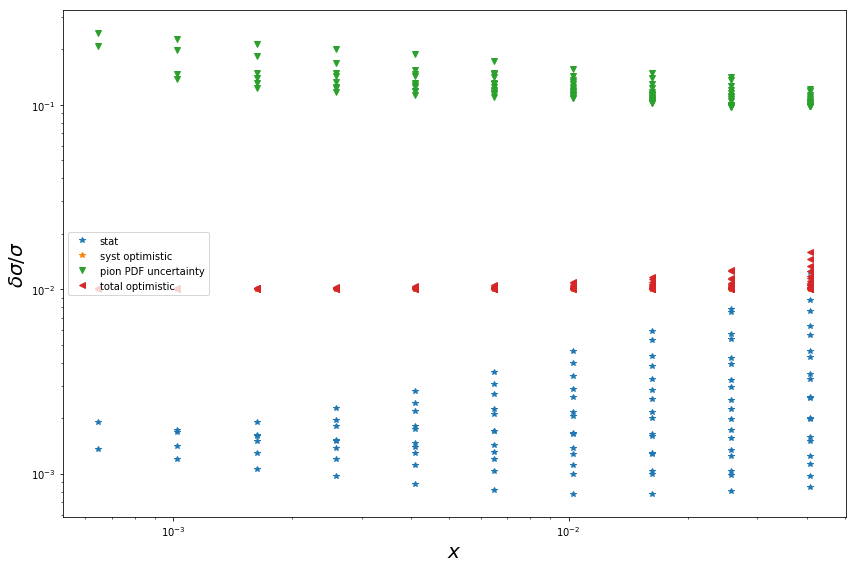

In [63]:
fig=py.figure(figsize=(4*3,4*2))
ax=py.subplot(111)
ax.plot(data['x0'],sig_statminK/sigminK,'*',label='stat')
ax.plot(data['x0'],sig_syst_ominK/sigminK,'*',label='syst optimistic')
ax.plot(data['x0'],dxsecminK/xsecminK,'v',label='pion PDF uncertainty')
#ax.plot(data['x0'],(sig_stat**2+sig_syst_o**2+dxsec**2)**0.5/sig,'<',label='total optimistic')
ax.plot(data['x0'],(sig_statminK**2+sig_syst_ominK**2)**0.5/sigminK,'<',label='total optimistic')
# ax.plot(data['x0'],sig_syst_p/sig,'*',label='syst pessimistic')
# ax.plot(data['x0'],(sig_stat**2+sig_syst_p**2)**0.5/sig,'*',label='total pessimistic')
ax.set_xlabel(r'$x$',size=20)
ax.set_ylabel(r'$\delta\sigma/\sigma$',size=20)
ax.semilogx()
ax.semilogy()
ax.legend(loc='center left')

py.tight_layout()
checkdir('gallery')
py.savefig('gallery/uncertaintiesminK.png')

In [64]:
sigmaxK=[]
sig_statmaxK=[]
sig_syst_omaxK=[]
sig_syst_pmaxK=[]
for i in range(len(data)):
    sigmaxK.append(xsecmaxK[i])
    sig_statmaxK.append(stat_u_maxK[i])
    sig_syst_omaxK.append(0.01*xsecmaxK[i])
    sig_syst_pmaxK.append(0.012*xsecmaxK[i])
sigmaxK=np.array(sigmaxK)
sig_statmaxK=np.array(sig_statminK)
sig_syst_omaxK=np.array(sig_syst_omaxK)
sig_syst_pmaxK=np.array(sig_syst_pmaxK)

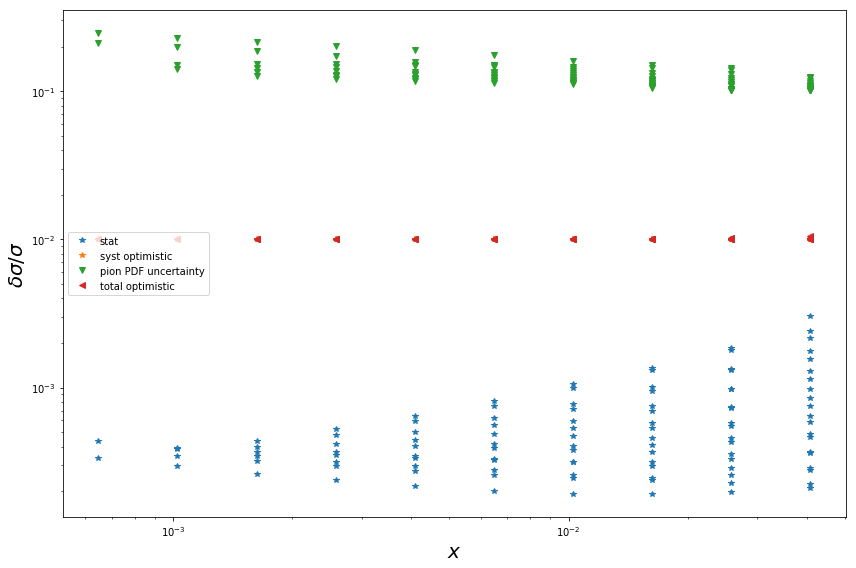

In [65]:
fig=py.figure(figsize=(4*3,4*2))
ax=py.subplot(111)
ax.plot(data['x0'],sig_statmaxK/sigmaxK,'*',label='stat')
ax.plot(data['x0'],sig_syst_omaxK/sigmaxK,'*',label='syst optimistic')
ax.plot(data['x0'],dxsecmaxK/xsecmaxK,'v',label='pion PDF uncertainty')
#ax.plot(data['x0'],(sig_stat**2+sig_syst_o**2+dxsec**2)**0.5/sig,'<',label='total optimistic')
ax.plot(data['x0'],(sig_statmaxK**2+sig_syst_omaxK**2)**0.5/sigmaxK,'<',label='total optimistic')
# ax.plot(data['x0'],sig_syst_p/sig,'*',label='syst pessimistic')
# ax.plot(data['x0'],(sig_stat**2+sig_syst_p**2)**0.5/sig,'*',label='total pessimistic')
ax.set_xlabel(r'$x$',size=20)
ax.set_ylabel(r'$\delta\sigma/\sigma$',size=20)
ax.semilogx()
ax.semilogy()
ax.legend(loc='center left')

py.tight_layout()
checkdir('gallery')
py.savefig('gallery/uncertaintiesmaxK.png')

In [66]:
resman.shutdown()

In [67]:
dK={}
dK['value_min']=xsecminK
dK['stat_u_min']=sig_statminK
dK['value_max']=xsecmaxK
dK['stat_u_max']=sig_statmaxK

In [68]:
xlsx_dK=pd.DataFrame(dK)
xlsx_dK.to_excel('EIC_values_K.xlsx')

In [74]:
sigmeanK=[]
sig_statmeanK=[]
sig_syst_omeanK=[]
sig_syst_pmeanK=[]
for i in range(len(data)):
    sigmeanK.append(xsecmeanK[i])
    sig_statmeanK.append(stat_u_meanK[i])
    sig_syst_omeanK.append(0.01*xsecmeanK[i])
    sig_syst_pmeanK.append(0.012*xsecmeanK[i])
sigmeanK=np.array(sigmeanK)
sig_statmeanK=np.array(sig_statmeanK)
sig_syst_omeanK=np.array(sig_syst_omeanK)
sig_syst_pmeanK=np.array(sig_syst_pmeanK)

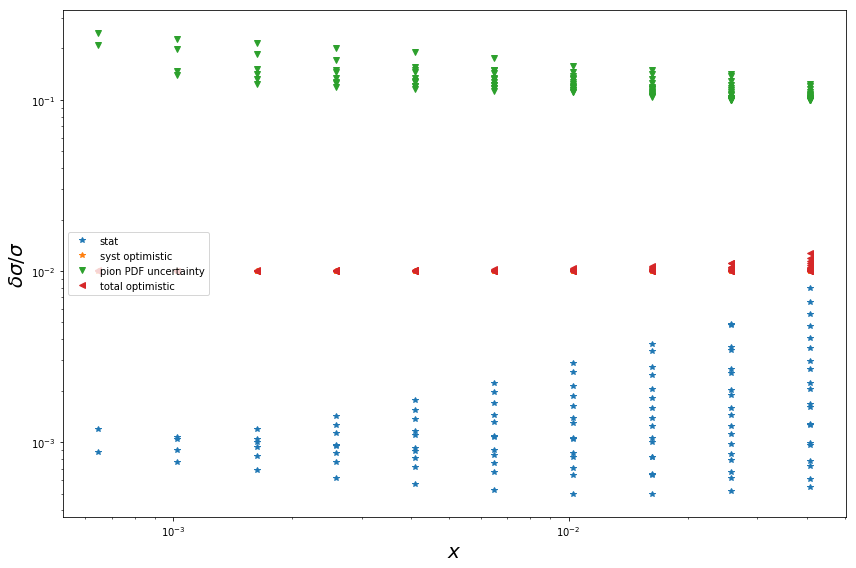

In [75]:
fig=py.figure(figsize=(4*3,4*2))
ax=py.subplot(111)
ax.plot(data['x0'],sig_statmeanK/sigmeanK,'*',label='stat')
ax.plot(data['x0'],sig_syst_omeanK/sigmeanK,'*',label='syst optimistic')
ax.plot(data['x0'],dxsecmeanK/xsecmeanK,'v',label='pion PDF uncertainty')
#ax.plot(data['x0'],(sig_stat**2+sig_syst_o**2+dxsec**2)**0.5/sig,'<',label='total optimistic')
ax.plot(data['x0'],(sig_statmeanK**2+sig_syst_omeanK**2)**0.5/sigmeanK,'<',label='total optimistic')
# ax.plot(data['x0'],sig_syst_p/sig,'*',label='syst pessimistic')
# ax.plot(data['x0'],(sig_stat**2+sig_syst_p**2)**0.5/sig,'*',label='total pessimistic')
ax.set_xlabel(r'$x$',size=20)
ax.set_ylabel(r'$\delta\sigma/\sigma$',size=20)
ax.semilogx()
ax.semilogy()
ax.legend(loc='center left')

py.tight_layout()
checkdir('gallery')
py.savefig('gallery/uncertaintiesmeanK.png')

In [76]:
dKmean={}
dKmean['value']=xsecmeanK
dKmean['stat_u']=sig_statmeanK

In [77]:
xlsx_dKmean=pd.DataFrame(dKmean)
xlsx_dKmean.to_excel('EIC_values_K_mean.xlsx')